# **<font color ='orange'>DEEPAK SINGH JAMWAL</font>**

# **The Sparks Foundation**

# **<u>Task 1<u>:**  *Prediction using Supervised Machine Learning*

## **<u>Goal<u> :** ***Predict the percentage of marks of a student based on the number of study hours.***
## In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.    


## ----------------------------------------------------------------------------------------------------

# Step 1 :Data Understanding

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [2]:
# Importing the Dataset and saving it in a Dataset
student_df = pd.read_csv("student_data.csv")

#Checking the dataset( as there are only 25 rows in the dataset, all will be shown here)
student_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Checking the info() of the dataset
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# checking some metrics in the dataset
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### It can be seen from above that the scores increase as the hours increase. The Maximum hours a student study as per the dataset is 9.2 hours and the corresponding score is 95.   !!GREAT!!    

# Step 2:  Data Visualisation

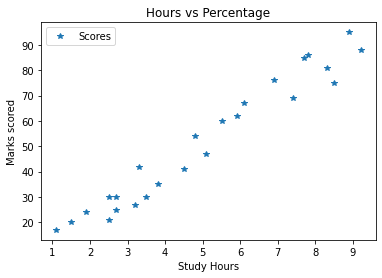

In [5]:
# Lets see the simple Graphical represetation of the dataset

student_df.plot(x='Hours', y='Scores', style ='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Study Hours')  
plt.ylabel('Marks scored')  
plt.show()
# Graph is very much linear

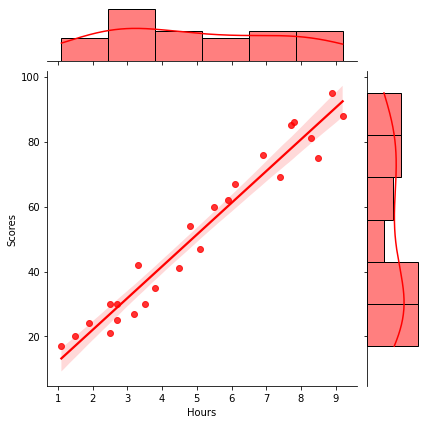

In [6]:
# using joint plot to check the regression line
sns.jointplot(x = 'Hours', y ='Scores', data = student_df, kind ="reg", color = 'red')

<AxesSubplot:>

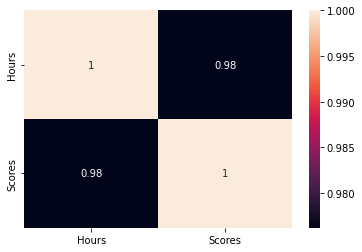

In [7]:
# Lets use the heatmap and check the correlation
sns.heatmap(student_df.corr(), annot = True)

# As expected there are highly correlated

## Step 3: Model Building

In [8]:
# storing the feature variable and Target variable in X and y respectively.
# Since the Algorithm accepts a array type column the following method is used.

X = student_df.iloc[:, :-1].values  
y = student_df.iloc[:, 1].values

# Checking the first 5 values of X and y
print(X[0:6])
print('-------')
print(y[0:6])

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]]
-------
[21 47 27 75 30 20]


In [9]:
# splitting the data into train and test for model building

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### ***Training the dataset using Linear Regression***


In [10]:
from sklearn.linear_model import LinearRegression  
#Instantiating our regressor 
lr = LinearRegression()  


In [11]:
# fitting the train_data into the regressor
lr.fit(X_train, y_train)

LinearRegression()

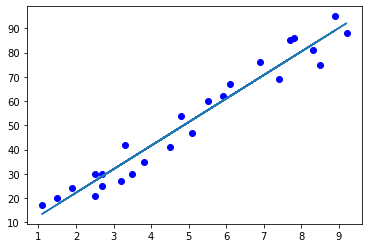

In [12]:
# Plotting the regression line
a = lr.coef_
b = lr.intercept_
line = a*X+b

# Plotting for the test data
plt.scatter(X, y,c ='blue' )
plt.plot(X, line);


## Making predictions on the test dataset


In [13]:
# Storing the predictions in a separate variable
y_pred = lr.predict(X_test)

In [14]:
# creating a dataframe for comparison between the Actual and predicted scores

final_df = pd.DataFrame({'Hours_studied':X_test.reshape(-1), 'Actual_scores': y_test, 'Predicted_score': y_pred})
final_df

,Hours_studied,Actual_scores,Predicted_score
0,8.3,81,83.391686
1,2.5,30,27.070549
2,2.5,21,27.070549
3,6.9,76,69.796929
4,5.9,62,60.086388
5,2.7,25,29.012657
6,3.3,42,34.838982
7,5.1,47,52.317955


## Slight variations can be observed in the actual and predicted values, but are acceptable.

In [15]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### From above we can deduce that for a student who studies for 9.2 hours the score is 95% and for a student who studies for 7.4 hours the score is 75%. Lets confirm the same with our model.

In [16]:
# Building a custome dataset for prediction
Hours = np.array([4.8, 6, 7.4, 8, 9.2]).reshape(-1, 1)
score_pred = lr.predict(Hours)
score_df = pd.DataFrame({'Hours_studied':Hours.reshape(-1),'Predicted_score': score_pred})
score_df
# predictions are quite similar so our model is performing nicely 

,Hours_studied,Predicted_score
0,4.8,49.404793
1,6.0,61.057442
2,7.4,74.652200
3,8.0,80.478524
4,9.2,92.131173


## Model Evaluation using different metrics

In [17]:
from sklearn.metrics import mean_absolute_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test,y_pred))

# we have a good r2_score i.e above 0.9 and a good MAE i.e below 5% which is excellent
# Hence the Model is performing well

Mean Absolute Error: 4.499999999999998
R2 Score: 0.9487647340257012


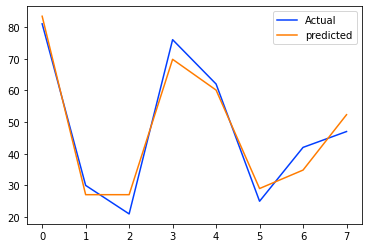

In [18]:
# plotting the difference between Actual and predicted scores
sns.set_palette('bright')
x_axis = range(len(y_test))
plt.plot(x_axis,y_test, label='Actual')
plt.plot(x_axis,y_pred, label='predicted')
plt.legend()
plt.show()


# <b> <font color='red'>!! Thank You !!</font><b>
